In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def give_me_df(ticker): 
    import yfinance as yf
    import pandas as pd
    stock = yf.Ticker(ticker) 
    df = stock.history(period='max')
    df[ticker] = df.Close.pct_change() 
    return df[[ticker]].iloc[1:]

def join_dfs(*dfs):
    for idx, df_ in enumerate(dfs):
        if idx == 0:
            df = df_
        else:
            df = df.join(df_, how='inner')
    return df

In [3]:
df_1 = give_me_df('SPY')
df_2 = give_me_df('AAPL')
df_3 = give_me_df('FB')
dh = join_dfs(df_1, df_2, df_3)

In [4]:
dh.shape

(2115, 3)

In [5]:
x = dh.iloc[-200:-100,:-1].values
y = dh.iloc[-200:-100,-1].values.reshape((-1,1)) 

In [6]:
print(x.shape, y.shape)

(100, 2) (100, 1)


In [7]:
def compute_X(x):
    ones = np.ones((x.shape[0], 1))
    X = np.concatenate((ones, x), axis=1)
    return X   

def loss(x, y, theta):
    X = compute_X(x)
    return ((X@theta-y).T @ (X@theta-y) / x.shape[0])[0,0]

def compute_gradients(x, y, theta):
    X = compute_X(x)
    return (2 / x.shape[0]) * (X.T@X@theta - X.T@y)

def apply_gradients(x, y, theta, lr):
    grad = compute_gradients(x, y, theta) 
    return theta - lr * grad

def predict(x, theta):
    X = compute_X(x)
    return X@theta

def normal_eq_sol(x, y):
    X = compute_X(x)
    return np.linalg.inv(X.T@X) @ X.T @ y    

In [14]:
def main():
    lr = 9e-1
    epoch = int(5e4)
    
    loss_trace = []
    al_trace = []
    bt1_trace = []
    bt2_trace = []
    theta_val = np.array([0,1,1]).reshape((-1,1))

    for i in range(epoch):   
        loss_val = loss(x, y, theta_val)
        loss_trace.append(loss_val)
        al_trace.append(theta_val[0,0])
        bt1_trace.append(theta_val[1,0])
        bt2_trace.append(theta_val[2,0])

        grad_val = compute_gradients(x, y, theta_val)
        theta_val = apply_gradients(x, y, theta_val, lr)
        
    y_pred = predict(x, theta_val) 
        
    plt.plot(loss_trace)
    plt.show()
    
    print(f'Normal Equation Sol alpha: {normal_eq_sol(x, y)[0,0]}')
    print(f'Normal Equation Sol beta1: {normal_eq_sol(x, y)[1,0]}')
    print(f'Normal Equation Sol beta2: {normal_eq_sol(x, y)[2,0]}')
    
    plt.plot(al_trace)
    plt.plot(normal_eq_sol(x, y)[0,0] * np.ones_like(np.array(al_trace)),
                                                    '--r')
    plt.show()
    
    plt.plot(bt1_trace)
    plt.plot(normal_eq_sol(x, y)[1,0] * np.ones_like(np.array(al_trace)),
                                                    '--r')
    plt.show()
    
    plt.plot(bt2_trace)
    plt.plot(normal_eq_sol(x, y)[2,0] * np.ones_like(np.array(al_trace)),
                                                    '--r')
    plt.show()
    
    plt.plot(y.reshape((-1,)), y_pred.reshape((-1,)), 'o')
    plt.show()
    
    print(f'Normal Equation Sol alpha: {normal_eq_sol(x, y)[0,0]}')
    print(f'Normal Equation Sol beta1: {normal_eq_sol(x, y)[1,0]}')
    print(f'Normal Equation Sol beta2: {normal_eq_sol(x, y)[2,0]}')

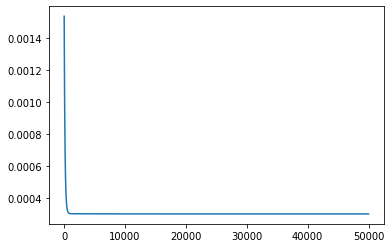

Normal Equation Sol alpha: 0.0013108924323685677
Normal Equation Sol beta1: 0.4007932543629358
Normal Equation Sol beta2: 0.5065992142659194


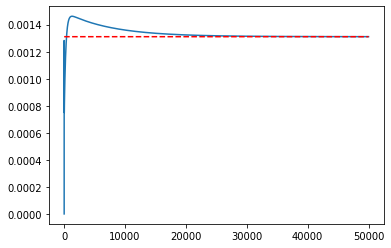

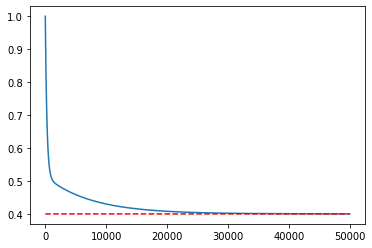

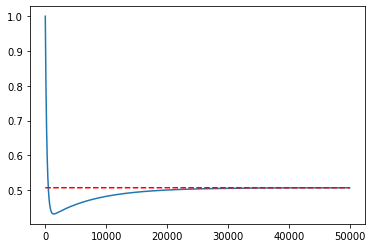

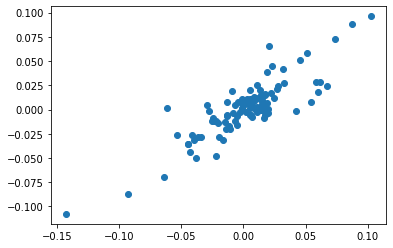

Normal Equation Sol alpha: 0.0013108924323685677
Normal Equation Sol beta1: 0.4007932543629358
Normal Equation Sol beta2: 0.5065992142659194


In [15]:
if __name__ == '__main__':
    main()